<a href="https://colab.research.google.com/github/illyesa/Bootcamp_GENAI_Fev2025/blob/main/Mini_Project_Advanced_Statistical_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

Saving AAPL, 1D 01012007-12072023.csv to AAPL, 1D 01012007-12072023.csv


{'AAPL, 1D 01012007-12072023.csv': b'volume,vwap,open,close,high,low,time,transactions\n1245444592.0,3.0302,3.0821,2.9929,3.0921,2.925,1167800400,189737\n855483384.0,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333\n835258032.0,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050\n797413848.0,3.0683,3.07,3.0525,3.0904,3.0457,1168232400,130547\n3352006588.0,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578\n2957841544.0,3.4289,3.3839,3.4643,3.4929,3.3375,1168405200,472159\n1442126952.0,3.4267,3.4264,3.4214,3.4564,3.3964,1168491600,231996\n1312948056.0,3.3663,3.3782,3.3793,3.395,3.3296,1168578000,212713\n1236226852.0,3.4438,3.4171,3.4679,3.4732,3.4089,1168923600,209005\n1672192060.0,3.4321,3.4843,3.3911,3.4857,3.3864,1169010000,254029\n2367293740.0,3.2376,3.2893,3.1811,3.2896,3.1804,1169096400,392744\n1365021084.0,3.1753,3.165,3.1607,3.2018,3.1471,1169182800,226920\n1453999596.0,3.094,3.1836,3.0996,3.1843,3.0589,1169442000,242125\n1208595836.0,3.0881,3.0614,3.0607,3.1254,3.0539,11

In [ ]:
import pandas as pd

data = pd.read_csv("AAPL, 1D 01012007-12072023.csv")
data['time'] = pd.to_datetime(data['time'], unit='s')
data.set_index('time', inplace=True)
null_values = data.isnull().sum()
data_types = data.dtypes

print("Null Values:\n", null_values)
print("\nData Types:\n", data_types)
print("\nFirst few rows of the dataset:\n", data.head())

Null Values:
 volume          0
vwap            0
open            0
close           0
high            0
low             0
transactions    0
dtype: int64

Data Types:
 volume          float64
vwap            float64
open            float64
close           float64
high            float64
low             float64
transactions      int64
dtype: object

First few rows of the dataset:
                            volume    vwap    open   close    high     low  \
time                                                                        
2007-01-03 05:00:00  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250   
2007-01-04 05:00:00  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936   
2007-01-05 05:00:00  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143   
2007-01-08 05:00:00  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457   
2007-01-09 05:00:00  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411   

                     transactions  
time                               
2007-0

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy import stats
from scipy.signal import convolve

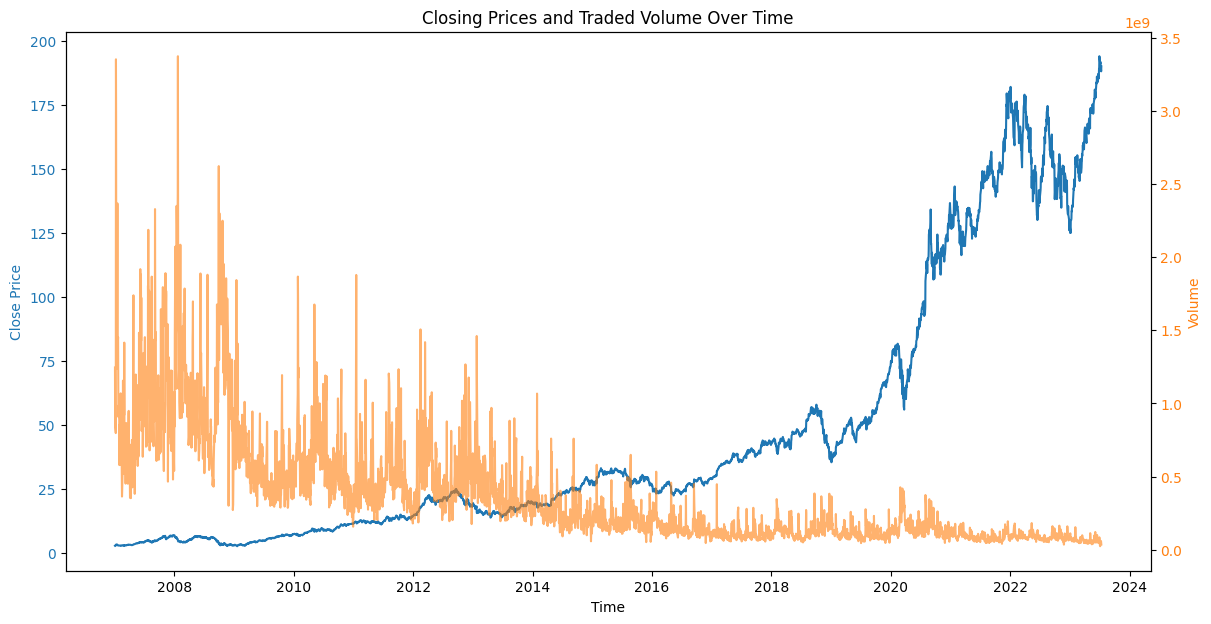

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(data.index, data['close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.plot(data.index, data['volume'], color='tab:orange', label='Volume', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Closing Prices and Traded Volume Over Time')
plt.show()

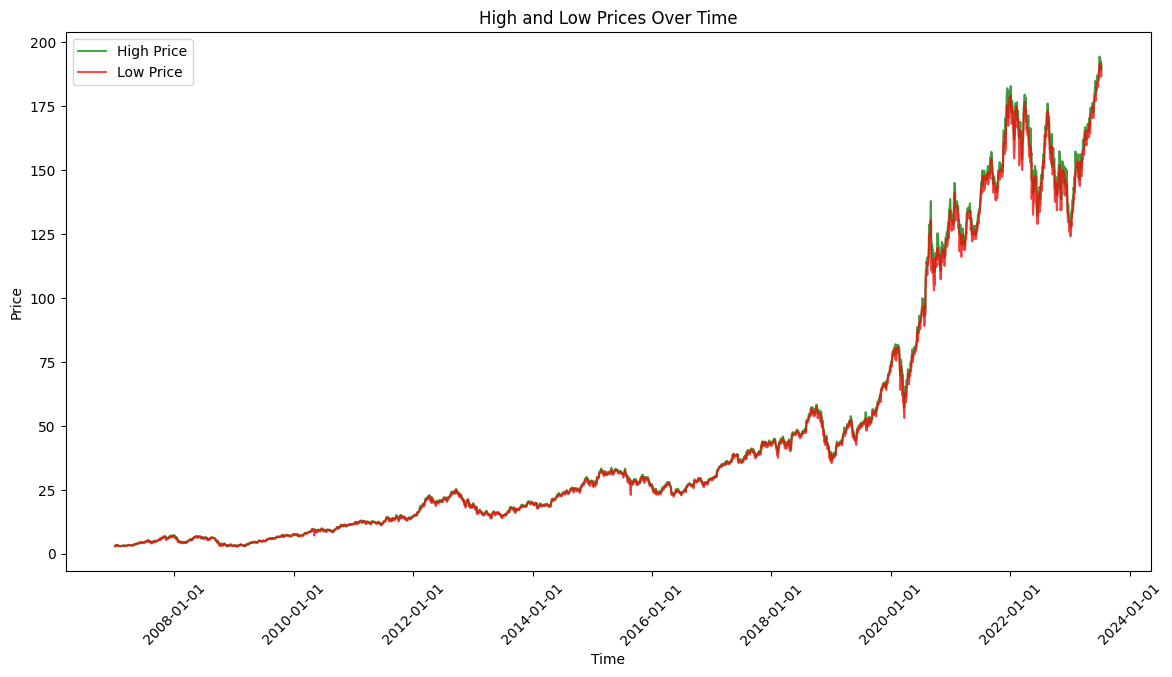

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(data.index, data['high'], color='green', label='High Price', alpha=0.7)
ax.plot(data.index, data['low'], color='red', label='Low Price', alpha=0.7)
ax.fill_between(data.index, data['low'], data['high'], color='gray', alpha=0.3)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
plt.title('High and Low Prices Over Time')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.legend()
plt.show()

Summary Statistics:
              close        volume
count  4159.000000  4.159000e+03
mean     46.396058  3.662925e+08
std      50.293482  3.724793e+08
min       2.792900  2.422234e+07
25%      11.947150  1.067497e+08
50%      25.825000  2.136463e+08
75%      52.231250  4.965321e+08
max     193.970000  3.373042e+09


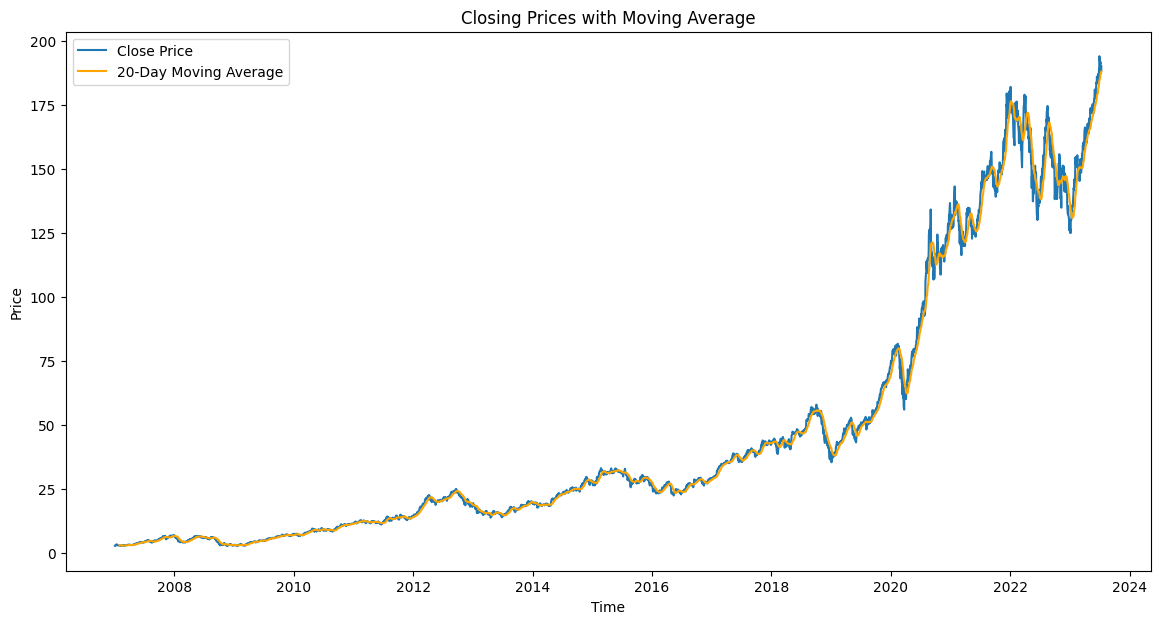

In [ ]:
summary_stats = data[['close', 'volume']].describe()
print("Summary Statistics:\n", summary_stats)
data['moving_avg'] = data['close'].rolling(window=20).mean()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['close'], label='Close Price')
plt.plot(data.index, data['moving_avg'], label='20-Day Moving Average', color='orange')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Closing Prices with Moving Average')
plt.legend()
plt.show()


In [ ]:
yearly_data = data.resample('YE').mean()
t_stat, p_value = stats.ttest_ind(yearly_data['close'][::2], yearly_data['close'][1::2])
print("t-statistic:", t_stat)
print("p-value:", p_value)

data['daily_return'] = data['close'].pct_change()
clean_returns = data['daily_return'].dropna()
clean_returns = clean_returns[np.isfinite(clean_returns)]
normality_test = stats.shapiro(clean_returns)
print("Normality test results: statistic = ", normality_test.statistic,", p-value = ", normality_test.pvalue)


t-statistic: 0.13746128555436402
p-value: 0.8924943789227648
Normality test results: statistic =  0.940666076855671 , p-value =  6.180858977992611e-38


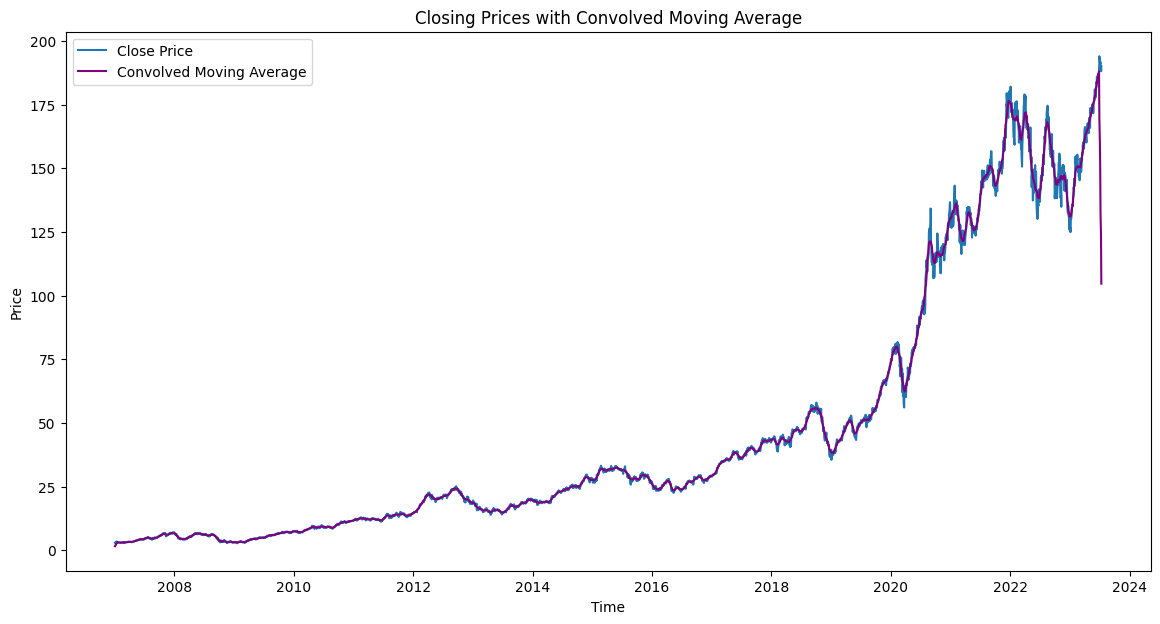

In [ ]:
window = np.ones(20) / 20
data['conv_moving_avg'] = convolve(data['close'], window, mode='same')

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['close'], label='Close Price')
plt.plot(data.index, data['conv_moving_avg'], label='Convolved Moving Average', color='purple')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Closing Prices with Convolved Moving Average')
plt.legend()
plt.show()


In [ ]:
aligned_data = data[['moving_avg', 'volume']].dropna()
correlation = np.corrcoef(aligned_data['moving_avg'], aligned_data['volume'])[0, 1]
print(f"Correlation between Moving Average and Volume: {correlation}")

Correlation between Moving Average and Volume: -0.5193323296629891
